In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde

In [125]:
df = pd.read_csv('/Users/kassywang/Documents/Summer Project/R/without outliers/Clean_complete_data_by_dipping_catergory.csv')
df = df.dropna(subset=["ratio_before", "ratio_after"])  # Ensure both targets are available

df.columns = df.columns.str.lower()

In [126]:
drop_cols = ["study_id", "match_id", "calculated_classification", "ratio_before", "ratio_after"]
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
X = pd.get_dummies(X, drop_first=True)  # encode categorical variables if any

# Clean feature names for LightGBM
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


In [127]:

y = df["ratio_after"]

X = X.dropna()
y = y.loc[X.index]


In [128]:
kde = gaussian_kde(y)
density = kde(y)

In [129]:
weights = 1 / density
weights = weights / np.mean(weights)


In [130]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.3, random_state=42)



In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "MLP": MLPRegressor(random_state=42, max_iter=1000)
}

In [133]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train, sample_weight=w_train)
    preds = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, preds),
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": mean_squared_error(y_test, preds, squared=False),
        "R2": r2_score(y_test, preds)
    }


In [134]:
results = {"Before Outlier Removal": {}, "After Outlier Removal": {}}


In [135]:
for name, model in models.items():
    results["After Outlier Removal"][name] = evaluate_model(model, X_train, X_test, y_train, y_test)


/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 489, number of used features: 21
[LightGBM] [Info] Start training from score -0.066475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/kassywang/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is 

In [136]:
after_df = pd.DataFrame(results["After Outlier Removal"]).T.round(4)


print("\n📊 Performance with ratio_after (after outlier removal):")
print(after_df)


📊 Performance with ratio_after (after outlier removal):
                      MAE     MSE    RMSE      R2
Linear Regression  0.0885  0.0143  0.1197 -2.7399
Random Forest      0.0510  0.0041  0.0641 -0.0735
XGBoost            0.0607  0.0059  0.0770 -0.5462
LightGBM           0.0614  0.0057  0.0755 -0.4893
Gradient Boosting  0.0616  0.0059  0.0770 -0.5491
AdaBoost           0.0535  0.0045  0.0674 -0.1870
Extra Trees        0.0533  0.0046  0.0679 -0.2030


In [137]:
best_model = SVR()


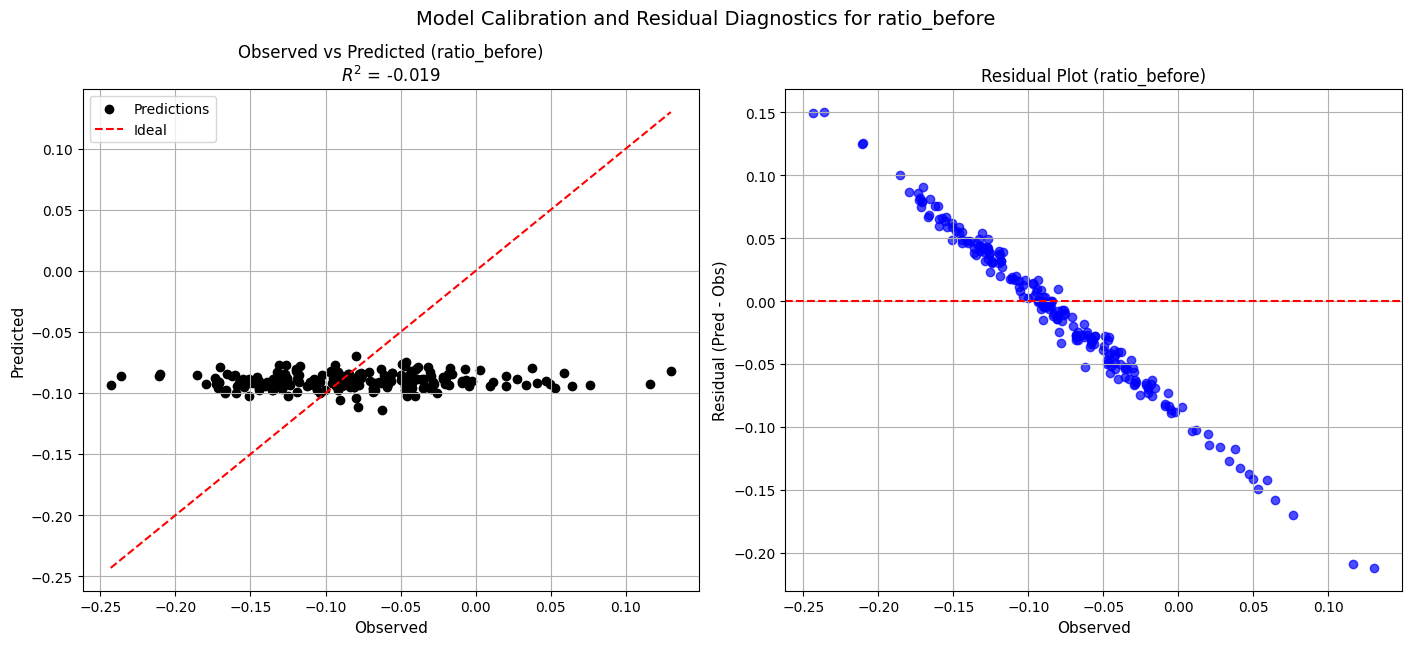

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# --- Plot 1: Observed vs. Predicted ---
axes[0].scatter(y_test, y_pred, color='black', label='Predictions')
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', label='Ideal')
axes[0].set_title(f"Observed vs Predicted (ratio_before)\n$R^2$ = {r2_score(y_test, y_pred):.3f}", fontsize=12)
axes[0].set_xlabel("Observed", fontsize=11)
axes[0].set_ylabel("Predicted", fontsize=11)
axes[0].legend()
axes[0].grid(True)

# --- Plot 2: Residuals ---
residuals = y_pred - y_test

axes[1].scatter(y_test, residuals, color='blue', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title("Residual Plot (ratio_before)", fontsize=12)
axes[1].set_xlabel("Observed", fontsize=11)
axes[1].set_ylabel("Residual (Pred - Obs)", fontsize=11)
axes[1].grid(True)

# Optional overall title (if submitting as a figure in thesis)
fig.suptitle("Model Calibration and Residual Diagnostics for ratio_before", fontsize=14, y=1.05)

# Show the plot
plt.show()
